In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

Exercise 1

In [2]:
db_iris = datasets.load_iris()

#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)
 
#An example of using the Euclidean distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)

In [3]:
from math import inf
from statistics import mode

def kNN(X_train, X_test, k):
    min_distances = []
    labels = []
    for point_test in range(X_test.shape[0]):
        min_distances.append([(inf, 0) for _ in range(k)])
        # distance count
        for point_train in range(X_train.shape[0]):
            min_distances[point_test].sort()
            dist = distance.euclidean(X_test[point_test], X_train[point_train])
            if dist < min_distances[point_test][-1][0]:
                min_distances[point_test][-1] = dist, y_train[point_train]
        labels.append(mode([min_distances[point_test][i][1] for i in range(k)]))
    return labels

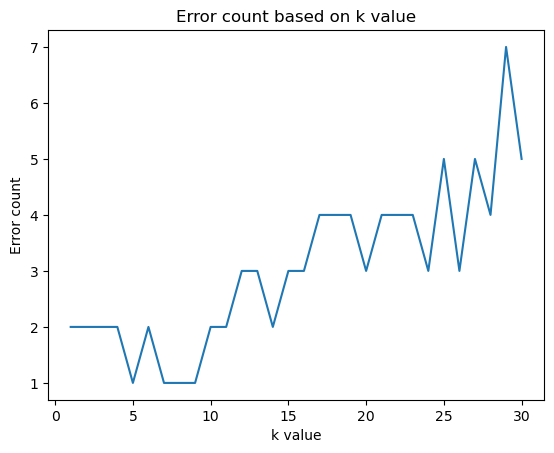

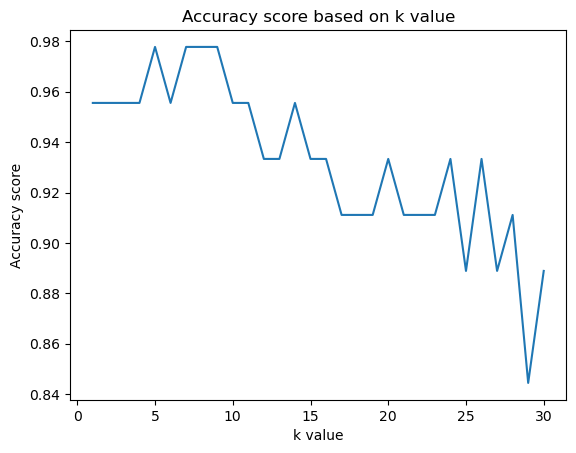

In [4]:
import matplotlib.pyplot as plt

errors = []
acc_scores = []
for k in range(1, 31):
    error = 0
    predictions = kNN(X_train, X_test, k)
    for i in range(y_test.shape[0]):
        if predictions[i] != y_test[i]:
            error += 1
    errors.append(error)
    acc_scores.append(accuracy_score(y_test, predictions))

plt.plot([_ for _ in range(1, 31)], errors)
plt.title('Error count based on k value')
plt.xlabel('k value')
plt.ylabel('Error count')
plt.show()

plt.plot([_ for _ in range(1, 31)], acc_scores)
plt.title('Accuracy score based on k value')
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show()

Exercise 2

In [5]:
from sklearn.neighbors import KNeighborsClassifier

c:\Users\tomis\anaconda3\envs\tomislaw_tarnawski\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\tomis\anaconda3\envs\tomislaw_tarnawski\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

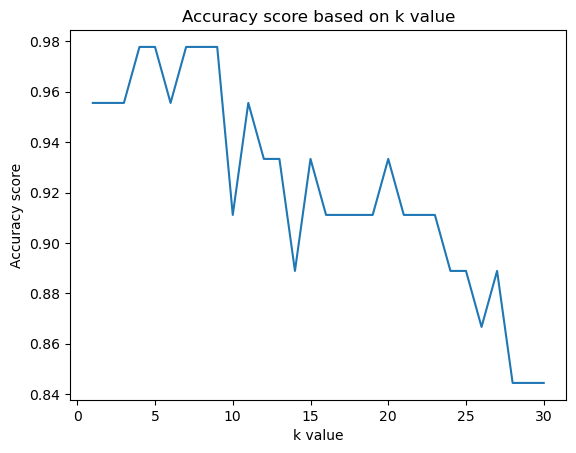

In [6]:
acc_scores_sk = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores_sk.append(accuracy_score(y_pred, y_test))
plt.plot([k for k in range(1, 31)], acc_scores_sk)
plt.title('Accuracy score based on k value')
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show()

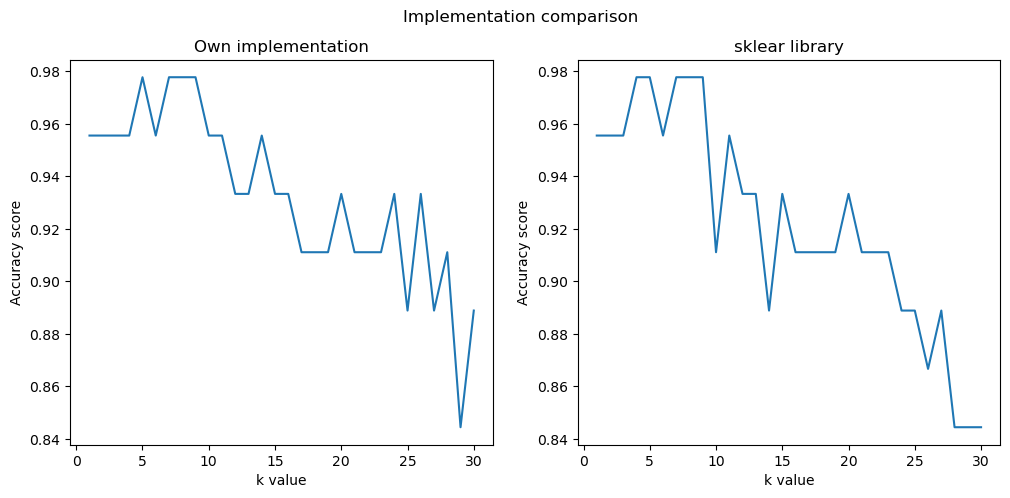

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Implementation comparison')
ax[0].plot([_ for _ in range(1, 31)], acc_scores)
ax[0].set_title('Own implementation')
ax[0].set_xlabel('k value')
ax[0].set_ylabel('Accuracy score')

ax[1].plot([k for k in range(1, 31)], acc_scores_sk)
ax[1].set_title('sklear library')
ax[1].set_xlabel('k value')
ax[1].set_ylabel('Accuracy score')
plt.show()

Exercise 3 - example

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [8]:
from six import StringIO  
import pydot 

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

Exercise 3

In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from scipy.io import loadmat
from tensorflow import keras

In [10]:
# wczytywanie danych (np. z biblioteki keras)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
 
#Ex.1.Divide the data into parameters X and answer y:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# # Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# # the height and width of the picture with the number
h = 28
w = 28
 
# # Ex 2. Please display the number of digits and the number of pixels per image
print("Number of digits:", X.shape[0])
print("Number of pixels per image:", X.shape[1] * X.shape[2])

Number of digits: 70000
Number of pixels per image: 784


In [11]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

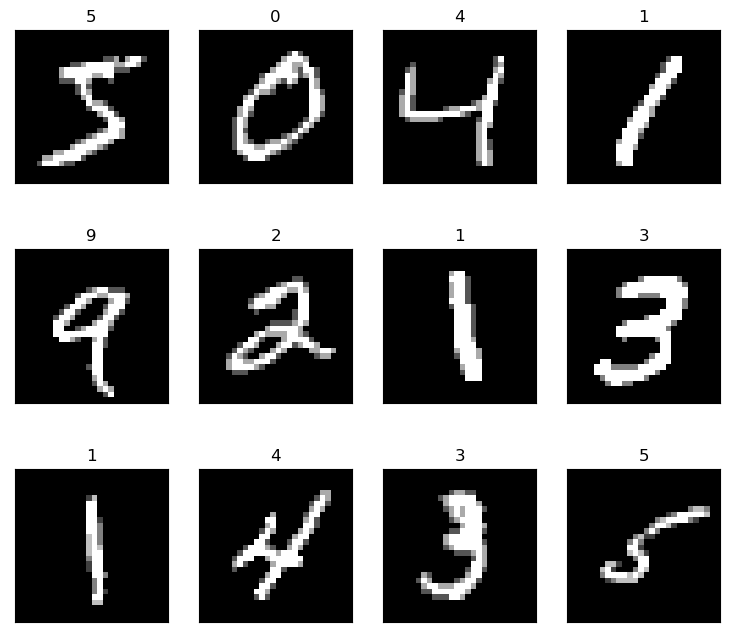

In [12]:
plot_mnist(X[0:12, :], y[0:12], h, w)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, train_size=0.7)

clf = tree.DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2038
           1       0.95      0.94      0.94      2355
           2       0.79      0.84      0.81      2068
           3       0.81      0.77      0.79      2144
           4       0.80      0.80      0.80      1968
           5       0.75      0.78      0.76      1932
           6       0.92      0.85      0.88      2130
           7       0.87      0.86      0.87      2230
           8       0.81      0.76      0.78      2059
           9       0.72      0.81      0.76      2076

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000



In [25]:
f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(len(f1_scores)):
    print(f"f1 score for {i}: {round(f1_scores[i], 2)}")

f1 score for 0: 0.91
f1 score for 1: 0.94
f1 score for 2: 0.81
f1 score for 3: 0.79
f1 score for 4: 0.8
f1 score for 5: 0.76
f1 score for 6: 0.88
f1 score for 7: 0.87
f1 score for 8: 0.78
f1 score for 9: 0.76


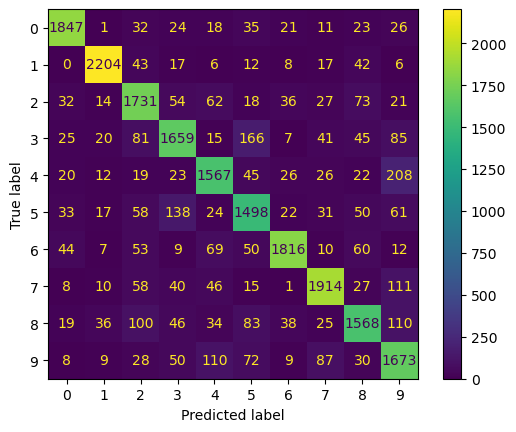

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()